## A.I Challenge

### Importing the dependencies

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Pre-processing the data

In [29]:
df = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [30]:
df_copy_1 = df.copy()
# Dropping unimportant columns
df_copy_1.drop(['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT'], inplace= True, axis= 1)

# Dropping 2021 and 2022 rows
df_copy_1 = df_copy_1[df_copy_1.JAHR != 2022]
df_copy_1 = df_copy_1[df_copy_1.JAHR != 2021]

# Dropping month rows where the value = 'Summe
df_copy_1 = df_copy_1[df_copy_1.MONAT != 'Summe']

df_copy_1

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [31]:
# Checking for missing values
df_copy_1.isnull().sum()

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
MONAT          0
WERT           0
dtype: int64

In [32]:
# Resetting all the indexs
df_copy_1 = df_copy_1.reset_index()
df_copy_1.head()
df_copy_1.drop('index', inplace= True, axis= 1)
df_copy_1.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,202001,28.0
1,Alkoholunfälle,insgesamt,2020,202002,40.0
2,Alkoholunfälle,insgesamt,2020,202003,27.0
3,Alkoholunfälle,insgesamt,2020,202004,26.0
4,Alkoholunfälle,insgesamt,2020,202005,40.0


In [33]:
# A function to reformat the monat column
def fix_monat_column():
    for index, value in enumerate(df_copy_1['MONAT']):
        value = list(value)
        value = value[-2:]
        new_value = ''.join(map(str, value))
        df_copy_1['MONAT'][index] = new_value

fix_monat_column()
df_copy_1.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_7672\3263749207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_1['MONAT'][index] = new_value


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,01,28.0
1,Alkoholunfälle,insgesamt,2020,02,40.0
2,Alkoholunfälle,insgesamt,2020,03,27.0
3,Alkoholunfälle,insgesamt,2020,04,26.0
4,Alkoholunfälle,insgesamt,2020,05,40.0


### Displaying the data

In [34]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

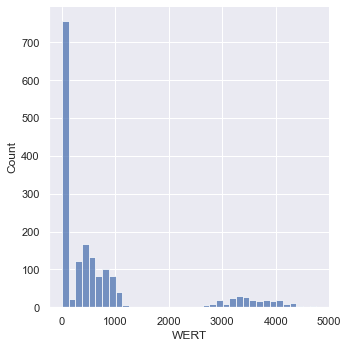

In [36]:
# Histogram of values
plt.figure(figsize=(10,10))
sns.displot(df_copy_1['WERT'])
plt.show

In [37]:
#skewness and kurtosis
print("Skewness: %f" % df_copy_1['WERT'].skew())
print("Kurtosis: %f" % df_copy_1['WERT'].kurt())

Skewness: 1.871505
Kurtosis: 2.119151


- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

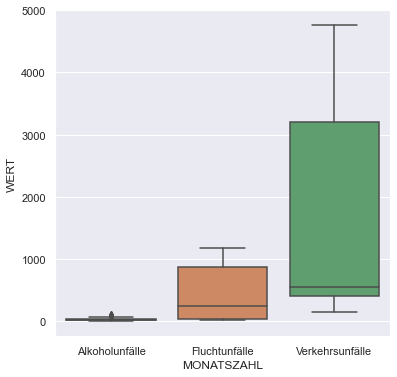

In [38]:
# Relationship with MONATSZAHL
var = 'MONATSZAHL'
data = pd.concat([df_copy_1['WERT'], df_copy_1[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x=var, y="WERT", data=data)

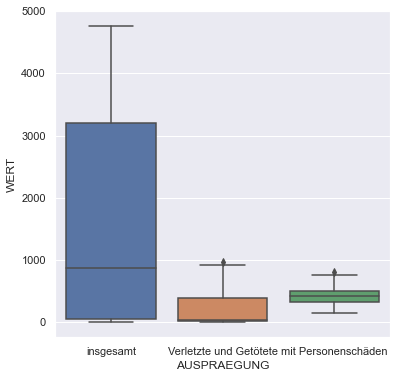

In [39]:
# Relationship with AUSPRAEGUNG
var = 'AUSPRAEGUNG'
data = pd.concat([df_copy_1['WERT'], df_copy_1[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x=var, y="WERT", data=data)

In [42]:
# A Dataframe with only MONAT value = 'Summe' to plot later
df_copy_2 = df.copy()
df_copy_2.drop(['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT'], inplace= True, axis= 1)
df_copy_2 = df_copy_2[df_copy_2.JAHR != 2022]
df_copy_2 = df_copy_2[df_copy_2.JAHR != 2021]
df_copy_2 = df_copy_2[df_copy_2.MONAT == 'Summe']
df_copy_2

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
38,Alkoholunfälle,insgesamt,2019,Summe,434.0
51,Alkoholunfälle,insgesamt,2018,Summe,398.0
64,Alkoholunfälle,insgesamt,2017,Summe,409.0
77,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
2021,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
2034,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
2047,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
2060,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='JAHR', ylabel='WERT'>

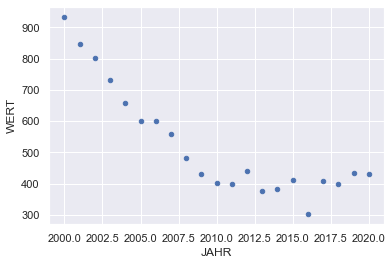

In [43]:
# Relationship between Alkoholunfälle and type insgesamt with the total value in each year
insgesamt_wert = df_copy_2[(df_copy_2.MONATSZAHL == 'Alkoholunfälle')]
insgesamt_wert= insgesamt_wert[(insgesamt_wert.AUSPRAEGUNG == 'insgesamt')]
var = 'JAHR'
insgesamt_wert.plot.scatter(x=var, y="WERT")

<AxesSubplot:xlabel='JAHR'>

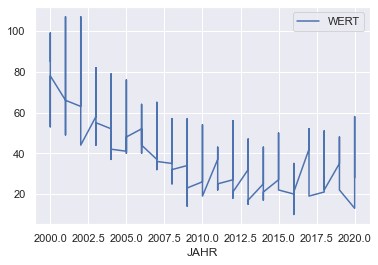

In [51]:
# Relationship between Alkoholunfälle and type insgesamt with the total value in every year
df_copy_3 = df_copy_1.copy()
monat_wert = df_copy_3[(df_copy_3.MONATSZAHL == 'Alkoholunfälle')]
monat_wert= monat_wert[(monat_wert.AUSPRAEGUNG == 'insgesamt')]
var = 'JAHR'
monat_wert.plot(x=var, y="WERT")

<AxesSubplot:xlabel='MONAT'>

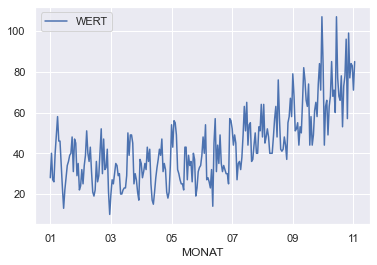

In [52]:
# Relationship between Alkoholunfälle and type insgesamt with the total value in each month
df_copy_3 = df_copy_1.copy()
monat_wert = df_copy_3[(df_copy_3.MONATSZAHL == 'Alkoholunfälle')]
monat_wert= monat_wert[(monat_wert.AUSPRAEGUNG == 'insgesamt')]
var = 'MONAT'
monat_wert.plot(x=var, y="WERT")

### Label Encoding

In [53]:
df_copy_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   object 
 1   AUSPRAEGUNG  1764 non-null   object 
 2   JAHR         1764 non-null   int64  
 3   MONAT        1764 non-null   object 
 4   WERT         1764 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 69.0+ KB


In [55]:
X = df_copy_1.drop(columns= ['WERT'], axis= 1)
Y = df_copy_1['WERT']
categorical_colums = ['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT']

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### One hot encoding the categorical values

In [57]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_colums]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_colums]))

In [58]:
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

In [59]:
num_X_train = X_train.drop(categorical_colums, axis = 1)
num_X_test = X_test.drop(categorical_colums, axis = 1)

#### Standard scale the numerical values

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaler_X_train = pd.DataFrame(scaler.fit_transform(X_train[['JAHR']]))
Scaler_X_test = pd.DataFrame(scaler.transform(X_test[['JAHR']]))

In [62]:
Scaler_X_train.index = X_train.index
Scaler_X_test.index = X_test.index

In [63]:
Scaler_X_train.columns = ['JAHR']
Scaler_X_test.columns = ['JAHR']

In [64]:
OH_X_train = pd.concat([Scaler_X_train, OH_cols_train], axis = 1)
OH_X_test = pd.concat([Scaler_X_test, OH_cols_test], axis = 1)

In [65]:
# Train the dataset with xgboost
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(OH_X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Testing the model

In [66]:
training_data_prediction = regressor.predict(OH_X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.9994770404452956


In [67]:
test_data_prediction = regressor.predict(OH_X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.9940164334875129


In [69]:
data = {'MONATSZAHL': ['Alkoholunfälle'], 'AUSPRAEGUNG' : ['insgesamt'], 'JAHR' : [2021], 'MONAT' : ['01']}
df_test = pd.DataFrame(data)
OH_df_test = pd.DataFrame(OH_encoder.transform(df_test[categorical_colums]))
num_df_test = df_test.drop(categorical_colums, axis = 1)
OH_df_test.index = df_test.index
OH_df = pd.concat([num_df_test, OH_df_test], axis = 1)
print(regressor.predict(OH_df))

[28.951513]
